# 10 Academy: Artificial Intelligence Mastery


## Project: Change point analysis and statistical modelling of time series data - detecting changes and associating causes on time series data

### Data Analysis Workflow
#### Ethel.C

In [1]:
import sys
import pandas as pd

scripts_dir = r'E:\DS+ML\AIM3\Week.10\Week.10.Brent_Oil_Price_Impacts\scripts'
data_path = r"E:\DS+ML\AIM3\Week.10\Data\merged_brent_events.csv"

if scripts_dir not in sys.path:
    sys.path.append(scripts_dir)

from eda_utils import eda_analysis
from timeseries_analysis import time_series_decomposition, arima_model, detect_change_points_l2, detect_change_points_rbf, cusum_analysis, bayesian_change_point_detection

pd.set_option('display.colheader_justify', 'right')

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.


### Load Merged Data

In [2]:
merged_data = pd.read_csv(data_path)
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
print("Merged Data Preview:".rjust(30))
print(merged_data.head(2).to_string(justify='right'))


          Merged Data Preview:
        Date  Price Event_Type Event_Description   Returns
0 1987-05-20  18.63        NaN               NaN       NaN
1 1987-05-21  18.45        NaN               NaN -0.966184


### EDA

    Exploratory Data Analysis:
               Missing Values:
Event_Type           7979
Event_Description    7979
Returns                 1
           Summary Statistics:
             Price      Returns
count  8360.000000  8359.000000
mean     46.459669     0.021820
std      32.504671     2.431979
min       9.100000   -47.465438
25%      18.780000    -1.109080
50%      31.750000     0.008894
75%      67.042500     1.185547
max     143.950000    35.203741


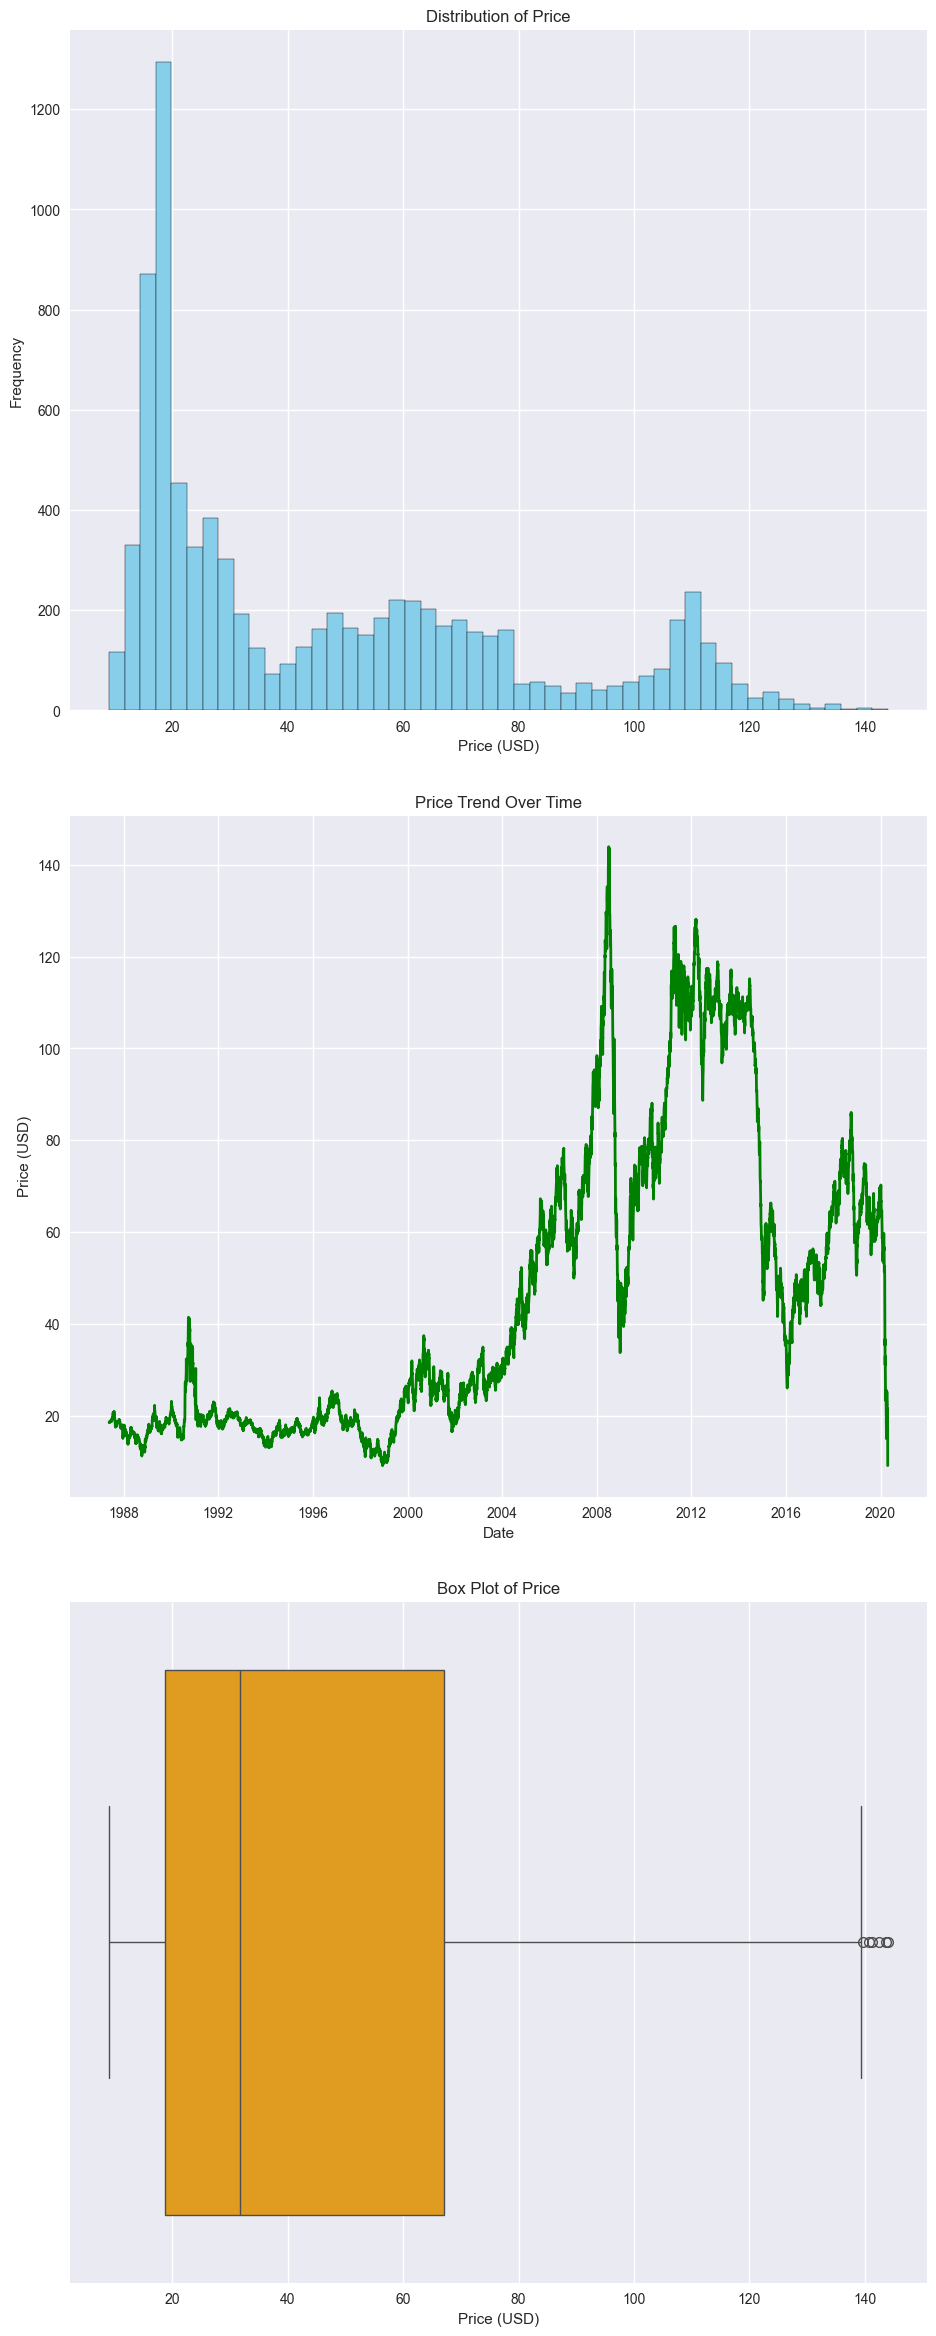

In [3]:
print("Exploratory Data Analysis:".rjust(30))
eda_analysis(merged_data, columns=['Price', 'Returns'])

### Time Series Decomposition

    Time Series Decomposition:


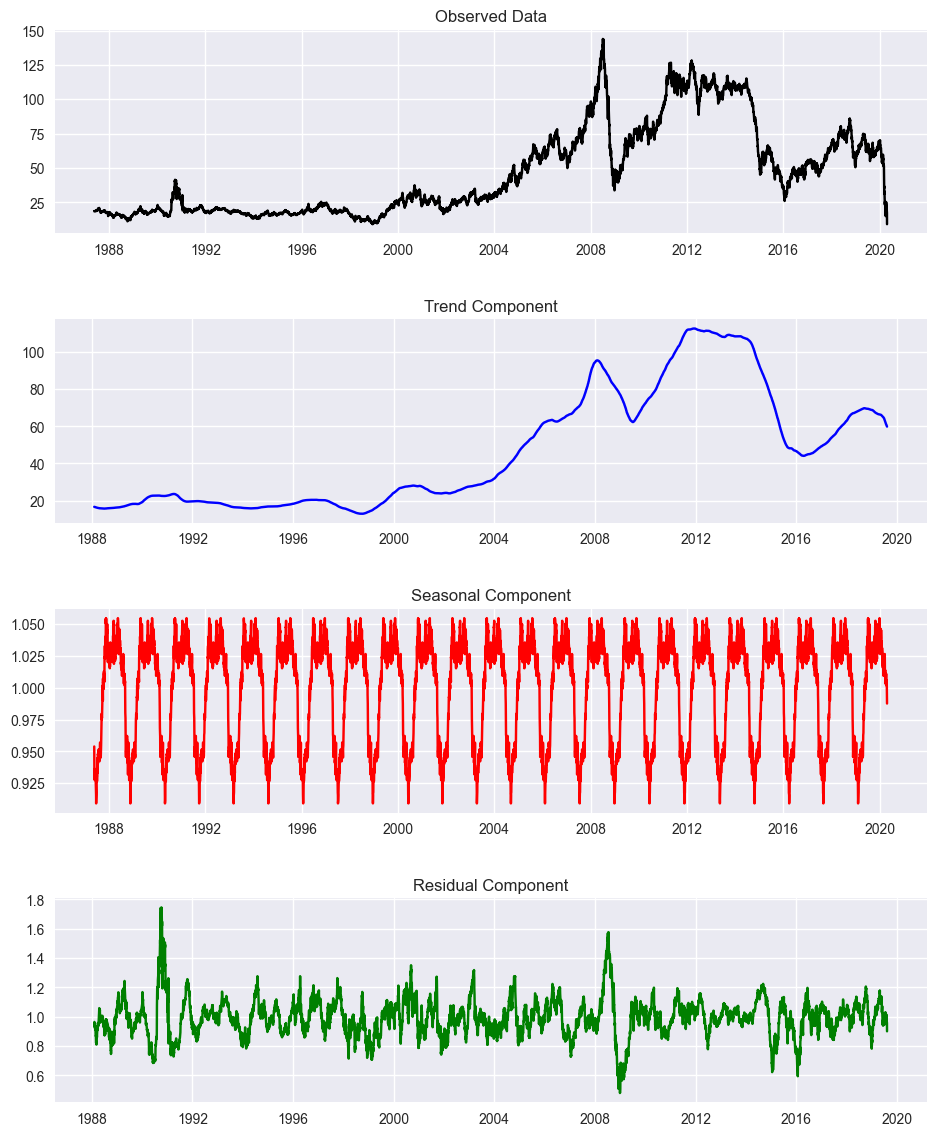

In [4]:
print("Time Series Decomposition:".rjust(30))
decomposition = time_series_decomposition(merged_data, period=365)

### ARIMA Modeling

               ARIMA Modeling:
          ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 8360
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12634.384
Date:                Sun, 23 Feb 2025   AIC                          25274.768
Time:                        20:40:33   BIC                          25295.862
Sample:                             0   HQIC                         25281.973
                               - 8360                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2291      0.214     -1.073      0.283      -0.648       0.190
ma.L1          0.2591      0.212      1.223      0.221      -0.156   

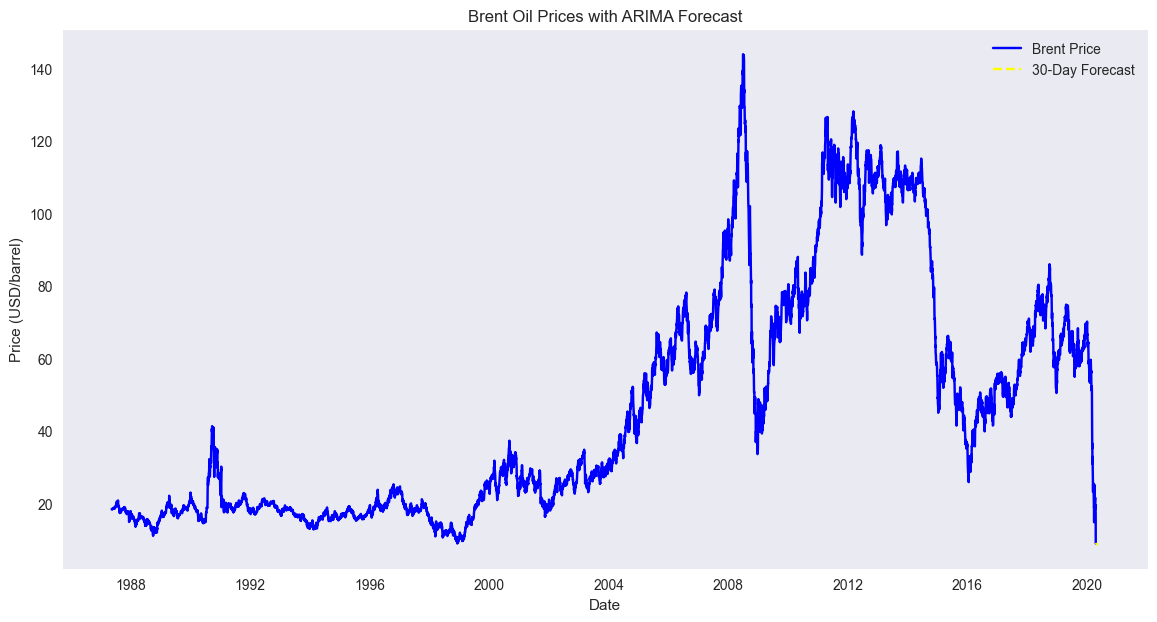

In [5]:
print("ARIMA Modeling:".rjust(30))
arima_results, forecast_df = arima_model(merged_data, order=(1, 1, 1), forecast_steps=30)

### Change Point Detection

       Change Point Detection:
        Pelt L2 Change Points:
                     1987-11-05 00:00:00
                     1988-01-27 00:00:00
                     1988-09-02 00:00:00
                     1988-11-25 00:00:00
                     1989-01-03 00:00:00
                     1989-03-14 00:00:00
                     1989-05-19 00:00:00
                     1989-09-29 00:00:00
                     1989-12-15 00:00:00
                     1990-02-21 00:00:00
                     1990-04-04 00:00:00
                     1990-07-16 00:00:00
                     1990-08-06 00:00:00
                     1990-09-03 00:00:00
                     1990-09-17 00:00:00
                     1990-10-22 00:00:00
                     1990-12-03 00:00:00
                     1991-01-16 00:00:00
                     1991-02-13 00:00:00
                     1991-09-20 00:00:00
                     1991-11-22 00:00:00
                     1992-04-29 00:00:00
                     1992-10-29 00:0

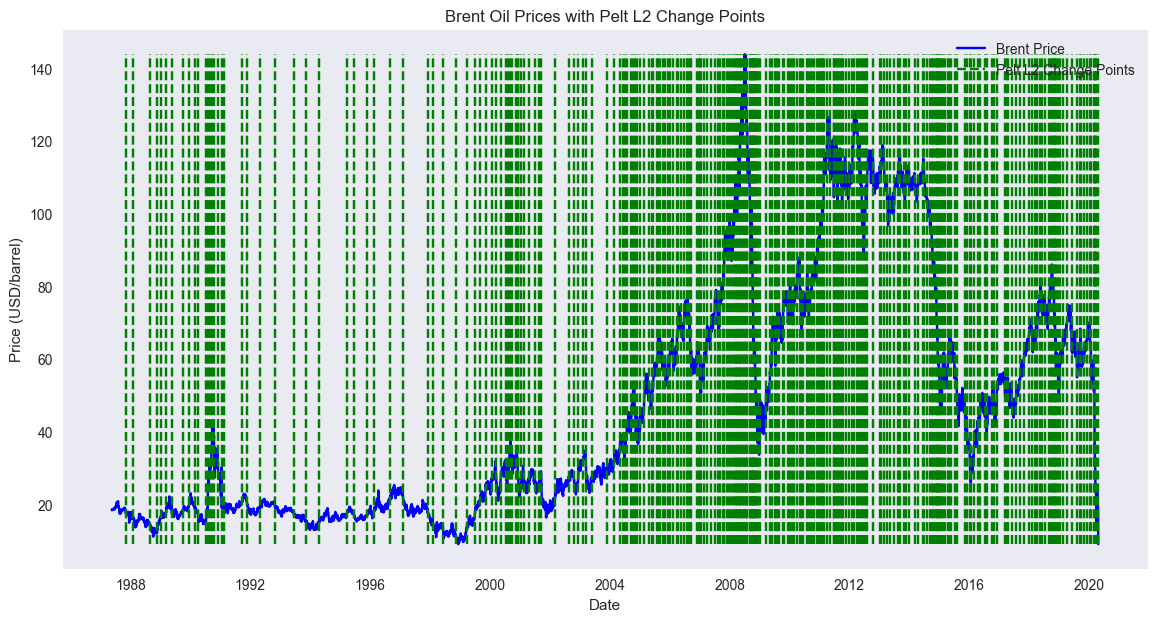

       Pelt RBF Change Points:
                     1999-11-02 00:00:00
                     2004-05-04 00:00:00
                     2005-06-16 00:00:00
                     2007-09-12 00:00:00
                     2008-03-06 00:00:00
                     2008-10-08 00:00:00
                     2009-05-29 00:00:00
                     2010-12-21 00:00:00
                     2014-09-08 00:00:00
                     2014-12-02 00:00:00
                     2015-08-04 00:00:00
                     2017-09-19 00:00:00
                     2020-03-09 00:00:00


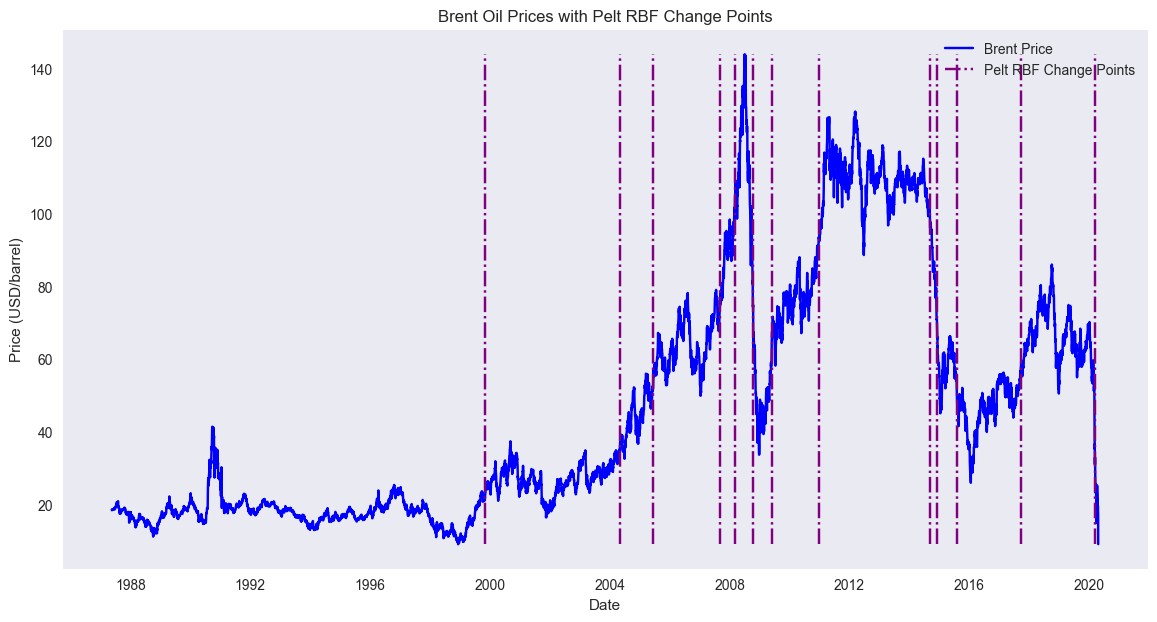

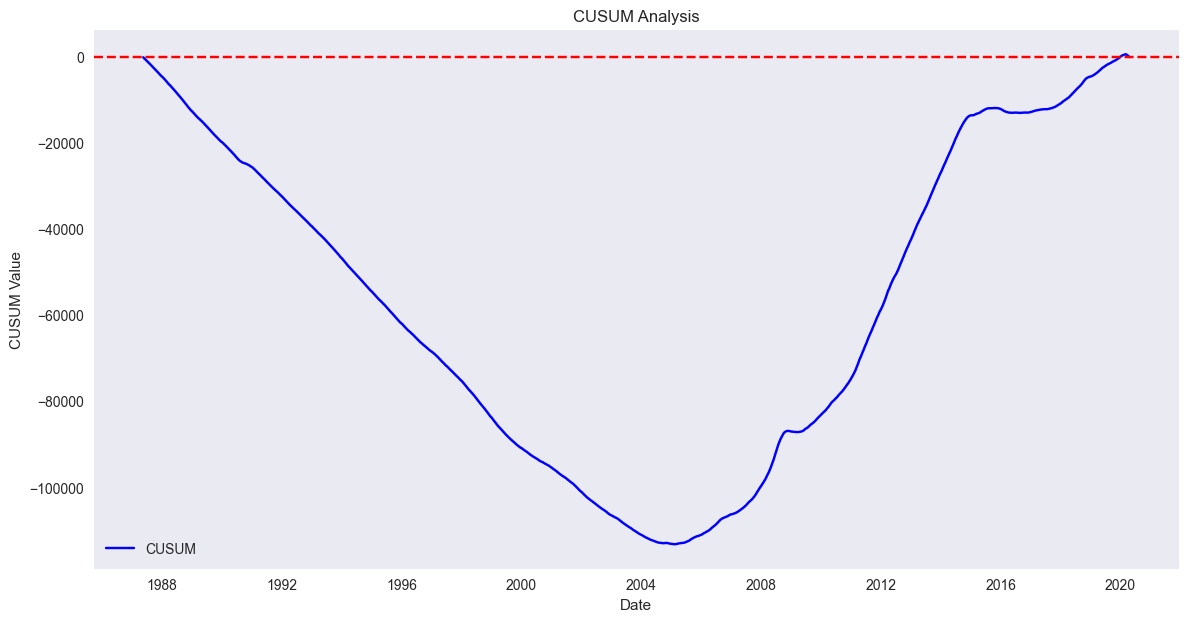

Sequential sampling (2 chains in 1 job)
CompoundStep
>NUTS: [mu_before, mu_after, sigma]
>Metropolis: [change_point]


Output()

Sampling 2 chains for 200 tune and 200 draw iterations (400 + 400 draws total) took 1019 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


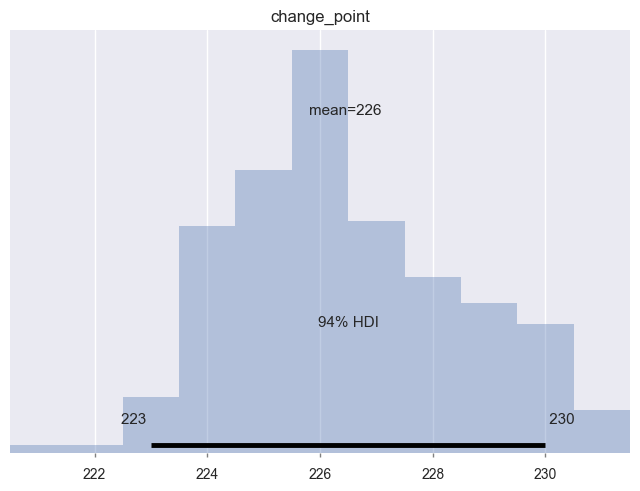

Bayesian Change Point: 2005-02-23 00:00:00


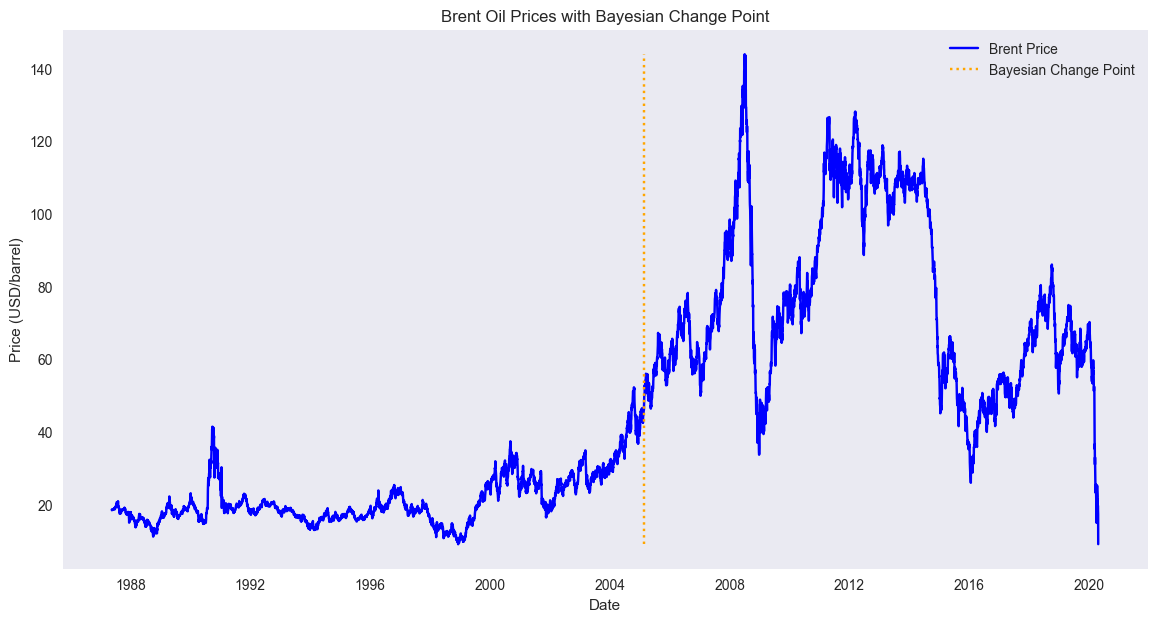

In [6]:
print("Change Point Detection:".rjust(30))
l2_dates = detect_change_points_l2(merged_data, pen=50)
rbf_dates = detect_change_points_rbf(merged_data, pen=20)
cusum_df = cusum_analysis(merged_data)
bayesian_date = bayesian_change_point_detection(merged_data, max_samples=200, tune_samples=200)

### Comprehensive Visualization

e:\DS+ML\AIM3\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


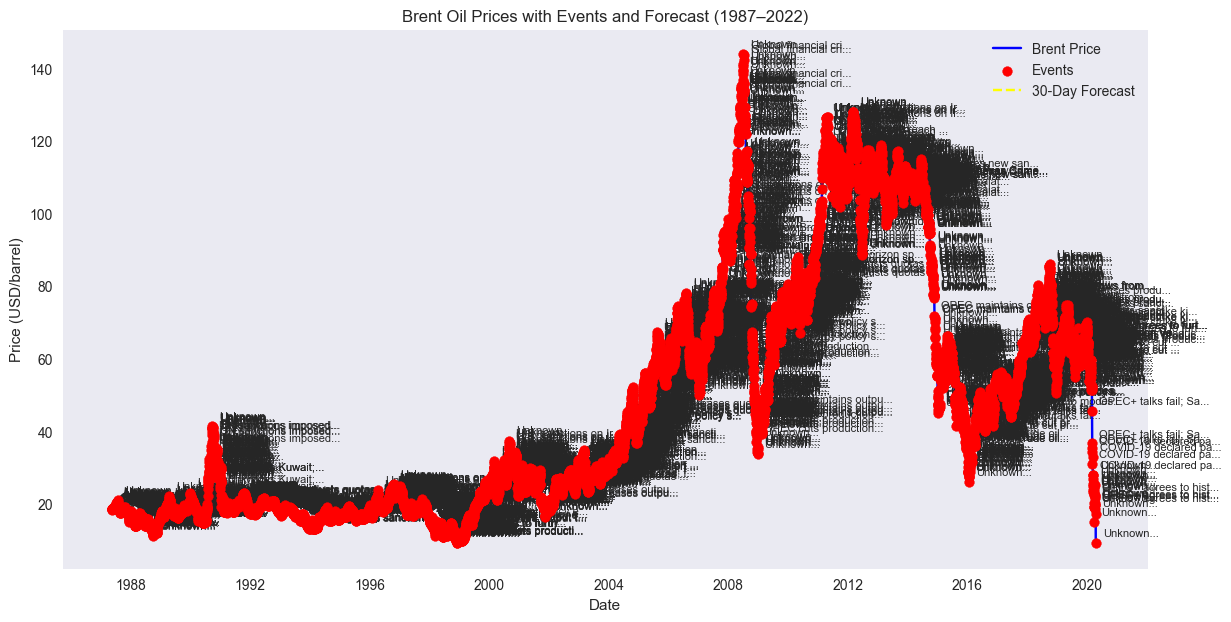

In [9]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(14, 7))
plt.plot(merged_data['Date'], merged_data['Price'], label='Brent Price', color='blue')
event_days = merged_data[merged_data['Event_Type'] != 'None'].copy()  # Create a copy to avoid SettingWithCopyWarning
event_days['Event_Description'] = event_days['Event_Description'].fillna('Unknown').astype(str)  # Ensure strings
plt.scatter(event_days['Date'], event_days['Price'], color='red', label='Events', zorder=5)
plt.plot(forecast_df['Date'], forecast_df['Forecasted Price'], color='yellow', label='30-Day Forecast', linestyle='--')
for i, txt in enumerate(event_days['Event_Description']):
    plt.annotate(txt[:20] + "...", (event_days['Date'].iloc[i], event_days['Price'].iloc[i]), 
                 xytext=(5, 5), textcoords='offset points', fontsize=8)
plt.title('Brent Oil Prices with Events and Forecast (1987–2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD/barrel)')
plt.legend()
plt.grid()
plt.show()